In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
import openbabel
import unimol_tools
import pickle
import os

## reflect latent_idx_dict to csv (delete latent_idx_dict!)

In [2]:
with open("../data/latent/latent_idx_dic.pkl", "rb") as f:
    latent_idx_dic = pickle.load(f)

In [3]:
csvs = os.listdir("../data/csv")
csvs = [csv.replace(".csv", "") for csv in csvs]
os.makedirs("../data/tox_csv")
for csv in csvs:
    df = pd.read_csv(f"../data/csv/{csv}.csv", index_col=0)
    idx = latent_idx_dic[csv]
    print(f"{csv}: ", df.shape[0])
    print("→ ", len(idx))
    df = df.loc[idx]
    df.to_csv(f"../data/tox_csv/{csv}.csv")

sider:  1426
→  1384
herg_karim:  13445
→  13445
tox21_M:  7831
→  7811
cyp3a4_inhib:  12328
→  12319
bace:  1513
→  1513
cyp2c9_inhib:  12092
→  12083
toxcast_M:  8577
→  8558
clintox_M:  1479
→  1468
ld50:  7385
→  7385


## get Uni-Mol molecular representations

In [4]:
clf = unimol_tools.UniMolRepr("molecule", remove_hs=False)
os.makedirs("../data/unimol_repr")
for csv in csvs:
    smis = pd.read_csv(f"../data/tox_csv/{csv}.csv", index_col=0)
    smis = list(smis["cano_smi"])
    unimol_repr = clf.get_repr(smis, return_atomic_reprs=False)
    unimol_repr = np.array(unimol_repr["cls_repr"])
    print(f"{csv}:", unimol_repr.shape)
    np.save(f"../data/unimol_repr/{csv}.npy", unimol_repr)

2025-01-23 23:24:05 | unimol_tools/models/unimol.py | 120 | INFO | Uni-Mol Tools | Loading pretrained weights from /opt/pip-env/lib/python3.12/site-packages/unimol_tools/weights/mol_pre_all_h_220816.pt
2025-01-23 23:24:06 | unimol_tools/data/conformer.py | 126 | INFO | Uni-Mol Tools | Start generating conformers...
1384it [00:22, 62.71it/s]
2025-01-23 23:24:28 | unimol_tools/data/conformer.py | 135 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 98.27% of molecules.
2025-01-23 23:24:28 | unimol_tools/data/conformer.py | 138 | INFO | Uni-Mol Tools | Failed conformers indices: [48, 56, 122, 132, 135, 197, 205, 241, 406, 712, 718, 1034, 1268, 1282, 1322, 1323, 1324, 1325, 1326, 1331, 1333, 1334, 1335, 1336]
2025-01-23 23:24:28 | unimol_tools/data/conformer.py | 142 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 96.39% of molecules.
2025-01-23 23:24:28 | unimol_tools/data/conformer.py | 145 | INFO | Uni-Mol Tools | Failed 3d conformers indices: [13, 47, 

sider: (1384, 512)


2025-01-23 23:24:39 | unimol_tools/data/conformer.py | 126 | INFO | Uni-Mol Tools | Start generating conformers...
13445it [05:14, 42.74it/s]
2025-01-23 23:29:54 | unimol_tools/data/conformer.py | 135 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 100.00% of molecules.
2025-01-23 23:29:54 | unimol_tools/data/conformer.py | 142 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 99.42% of molecules.
2025-01-23 23:29:54 | unimol_tools/data/conformer.py | 145 | INFO | Uni-Mol Tools | Failed 3d conformers indices: [320, 418, 472, 638, 798, 843, 1047, 1317, 1449, 1876, 1891, 2033, 2037, 2237, 2242, 2269, 2287, 2348, 2720, 2886, 3052, 3239, 3923, 4091, 4212, 4410, 4610, 4611, 4724, 4943, 4962, 5063, 5141, 5145, 5315, 5525, 5642, 5883, 6091, 6282, 6606, 6657, 6786, 6912, 7493, 7781, 7973, 8023, 8189, 8875, 8950, 8971, 9004, 9012, 9013, 9020, 9386, 9874, 9899, 10219, 10447, 10505, 10789, 11002, 11025, 11321, 11446, 11456, 11495, 11630, 11833, 11836, 12184, 12263

herg_karim: (13445, 512)


2025-01-23 23:30:16 | unimol_tools/data/conformer.py | 126 | INFO | Uni-Mol Tools | Start generating conformers...
7811it [01:05, 118.48it/s]
2025-01-23 23:31:22 | unimol_tools/data/conformer.py | 135 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 99.81% of molecules.
2025-01-23 23:31:22 | unimol_tools/data/conformer.py | 138 | INFO | Uni-Mol Tools | Failed conformers indices: [95, 255, 656, 1418, 1529, 1717, 2138, 2242, 2750, 4014, 4364, 4600, 5927, 6462, 6701]
2025-01-23 23:31:22 | unimol_tools/data/conformer.py | 142 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 99.22% of molecules.
2025-01-23 23:31:22 | unimol_tools/data/conformer.py | 145 | INFO | Uni-Mol Tools | Failed 3d conformers indices: [95, 114, 149, 217, 218, 255, 656, 948, 969, 981, 1061, 1212, 1226, 1418, 1529, 1577, 1592, 1717, 1926, 1949, 2138, 2242, 2289, 2493, 2524, 2725, 2750, 2822, 2933, 3234, 3438, 3501, 3785, 3996, 4014, 4273, 4292, 4364, 4481, 4600, 4797, 4858, 5234, 5285, 5

tox21_M: (7811, 512)


2025-01-23 23:31:41 | unimol_tools/data/conformer.py | 126 | INFO | Uni-Mol Tools | Start generating conformers...
12319it [03:54, 52.48it/s]
2025-01-23 23:35:36 | unimol_tools/data/conformer.py | 135 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 100.00% of molecules.
2025-01-23 23:35:36 | unimol_tools/data/conformer.py | 142 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 99.23% of molecules.
2025-01-23 23:35:36 | unimol_tools/data/conformer.py | 145 | INFO | Uni-Mol Tools | Failed 3d conformers indices: [3509, 3512, 3534, 3546, 3559, 3572, 3575, 3576, 3626, 3986, 3987, 4105, 4112, 4122, 4123, 4124, 4157, 4166, 4167, 4174, 4184, 4344, 4383, 4397, 4417, 4470, 4486, 4562, 4580, 4582, 4623, 4674, 4759, 4847, 4850, 4856, 5021, 5108, 5495, 5504, 5757, 5867, 5878, 5914, 5915, 5948, 5965, 6041, 6047, 6063, 6069, 6078, 6079, 6169, 6174, 6210, 6267, 6274, 6383, 6410, 6678, 6791, 6827, 8093, 12022, 12023, 12024, 12025, 12026, 12027, 12028, 12029, 12030, 1203

cyp3a4_inhib: (12319, 512)


2025-01-23 23:35:53 | unimol_tools/data/conformer.py | 126 | INFO | Uni-Mol Tools | Start generating conformers...
1513it [00:24, 61.43it/s] 
2025-01-23 23:36:18 | unimol_tools/data/conformer.py | 135 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 100.00% of molecules.
2025-01-23 23:36:18 | unimol_tools/data/conformer.py | 142 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 100.00% of molecules.
100%|██████████| 48/48 [00:02<00:00, 18.03it/s]


bace: (1513, 512)


2025-01-23 23:36:25 | unimol_tools/data/conformer.py | 126 | INFO | Uni-Mol Tools | Start generating conformers...
12083it [04:19, 46.65it/s]
2025-01-23 23:40:44 | unimol_tools/data/conformer.py | 135 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 99.99% of molecules.
2025-01-23 23:40:44 | unimol_tools/data/conformer.py | 138 | INFO | Uni-Mol Tools | Failed conformers indices: [5625]
2025-01-23 23:40:44 | unimol_tools/data/conformer.py | 142 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 99.15% of molecules.
2025-01-23 23:40:44 | unimol_tools/data/conformer.py | 145 | INFO | Uni-Mol Tools | Failed 3d conformers indices: [3603, 3606, 3632, 3645, 3657, 3672, 3675, 3676, 3725, 4077, 4078, 4079, 4190, 4197, 4208, 4209, 4210, 4246, 4254, 4255, 4272, 4423, 4465, 4477, 4498, 4550, 4565, 4639, 4658, 4661, 4703, 4748, 4841, 4938, 4941, 4947, 5116, 5206, 5611, 5623, 5625, 5686, 5920, 6038, 6051, 6089, 6090, 6120, 6138, 6222, 6226, 6242, 6250, 6261, 6262, 6297

cyp2c9_inhib: (12083, 512)


2025-01-23 23:41:03 | unimol_tools/data/conformer.py | 126 | INFO | Uni-Mol Tools | Start generating conformers...
8558it [00:58, 147.40it/s]
2025-01-23 23:42:01 | unimol_tools/data/conformer.py | 135 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 99.89% of molecules.
2025-01-23 23:42:01 | unimol_tools/data/conformer.py | 138 | INFO | Uni-Mol Tools | Failed conformers indices: [47, 93, 6986, 7002, 7129, 7154, 7177, 7221, 7232]
2025-01-23 23:42:01 | unimol_tools/data/conformer.py | 142 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 99.18% of molecules.
2025-01-23 23:42:01 | unimol_tools/data/conformer.py | 145 | INFO | Uni-Mol Tools | Failed 3d conformers indices: [22, 47, 93, 199, 220, 254, 695, 1538, 1546, 1555, 1774, 1794, 1841, 2004, 2032, 2101, 2157, 2668, 2891, 3066, 3186, 3462, 3653, 3957, 4094, 4141, 4647, 4651, 4903, 4904, 5243, 5278, 5297, 5343, 5472, 5580, 6046, 6369, 6552, 6795, 6981, 6984, 6986, 7002, 7020, 7049, 7110, 7112, 7126, 7128, 

toxcast_M: (8558, 512)


2025-01-23 23:42:19 | unimol_tools/data/conformer.py | 126 | INFO | Uni-Mol Tools | Start generating conformers...
1468it [00:24, 60.58it/s]
2025-01-23 23:42:43 | unimol_tools/data/conformer.py | 135 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 99.93% of molecules.
2025-01-23 23:42:43 | unimol_tools/data/conformer.py | 138 | INFO | Uni-Mol Tools | Failed conformers indices: [10]
2025-01-23 23:42:43 | unimol_tools/data/conformer.py | 142 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 98.30% of molecules.
2025-01-23 23:42:43 | unimol_tools/data/conformer.py | 145 | INFO | Uni-Mol Tools | Failed 3d conformers indices: [5, 10, 17, 18, 22, 395, 598, 701, 732, 734, 737, 738, 1229, 1233, 1291, 1293, 1335, 1337, 1338, 1339, 1458, 1459, 1464, 1465, 1467]
100%|██████████| 46/46 [00:03<00:00, 14.04it/s]


clintox_M: (1468, 512)


2025-01-23 23:42:48 | unimol_tools/data/conformer.py | 126 | INFO | Uni-Mol Tools | Start generating conformers...
7385it [00:25, 285.03it/s]
2025-01-23 23:43:14 | unimol_tools/data/conformer.py | 135 | INFO | Uni-Mol Tools | Succeeded in generating conformers for 100.00% of molecules.
2025-01-23 23:43:14 | unimol_tools/data/conformer.py | 142 | INFO | Uni-Mol Tools | Succeeded in generating 3d conformers for 99.91% of molecules.
2025-01-23 23:43:14 | unimol_tools/data/conformer.py | 145 | INFO | Uni-Mol Tools | Failed 3d conformers indices: [1647, 1677, 3463, 3619, 5021, 5678, 6764]
100%|██████████| 231/231 [00:09<00:00, 24.37it/s]


ld50: (7385, 512)


# Checking distribution of the representaions

In [13]:
TfVAE_repr_dir = "/workspace/ToxPred/MolKAN/molkan/data/TfVAE_repr"
Unimol_repr_dir = "/workspace/ToxPred/MolKAN/molkan/data/unimol_repr"

Text(0.5, 1.0, 'distributions of TransformerVAE latent representations')

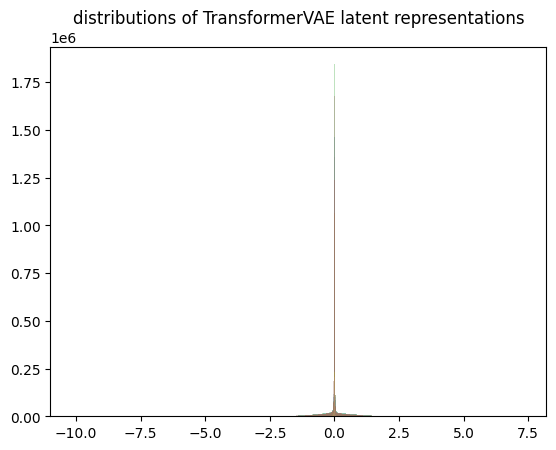

In [26]:
for d in os.listdir(TfVAE_repr_dir):
    arr = np.load(os.path.join(TfVAE_repr_dir, d))
    arr = arr.flatten()
    plt.hist(arr, bins=1000, alpha=0.3)
plt.title("distributions of TransformerVAE latent representations")

Text(0.5, 1.0, 'distributions of TransformerVAE latent representations (log)')

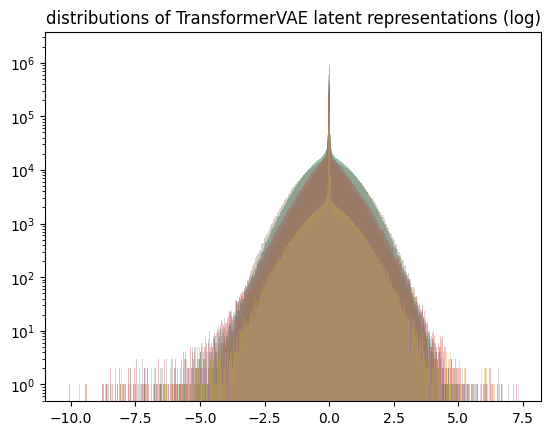

In [27]:
for d in os.listdir(TfVAE_repr_dir):
    arr = np.load(os.path.join(TfVAE_repr_dir, d))
    arr = arr.flatten()
    plt.hist(arr, bins=1000, alpha=0.3)
plt.yscale("log")
plt.title("distributions of TransformerVAE latent representations (log)")

Text(0.5, 1.0, 'distributions of UniMol latent representations')

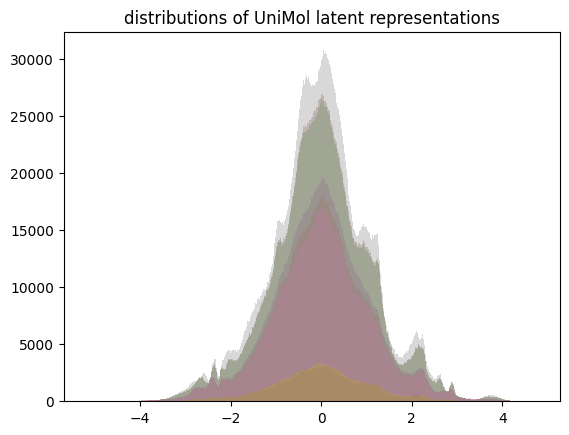

In [28]:
for d in os.listdir(Unimol_repr_dir):
    arr = np.load(os.path.join(Unimol_repr_dir, d))
    arr = arr.flatten()
    plt.hist(arr, bins=1000, alpha=0.3)
plt.title("distributions of UniMol latent representations")